## Введение в анализ данных, ИАД-1

## НИУ ВШЭ, 2018-19 учебный год

###  Домашнее задание №3. Обработка текстов. Линейная классификация.

Задание выполнил(а): Генов Александр

### Общая информация
__Дата выдачи:__ 28.04.2019

__Дедлайн:__ 23:59 12.05.2019

### Оценивание и штрафы

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи
__Стирать условия нельзя!__

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Формат названия файла: homework_03_Фамилия_Имя.ipynb

In [39]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

В задании вам предоставлены реальные текстовые данные. 

Необходимо построить алгоритм, который будет по тексту документа определять тип источника:
 - Микроблоги
 - Новости
 - Отзывы
 - Форумы
 - Блоги
 - Видео
 - Мессенджеры

## Часть 1. Работа с текстовыми данными

 ### 1. Исследование данных

[2 балла]

Скачаем данные отсюда:
https://yadi.sk/d/o3cPgFAq5gALiw

In [40]:
D = pd.read_csv('texts_dataset.csv', sep=';', index_col=0)

C:\python\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [41]:
D.head()

,Дата,ID сообщения,Заголовок,Текст,Дублей,Тип источника
0,27.04.2019 13:18,1396238,NaN,"-Здравствуйте, тинькофф банк\n-Мать твою ебал\...",1.0,Микроблоги
1,27.04.2019 13:15,1396239,NaN,Почему Немагия сделала обзор на Тинькова? #нем...,1.0,Микроблоги
2,27.04.2019 13:10,1396248,Forbes назвал самые экстравагантные инвестиции...,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 57 ...",2.0,Новости
3,27.04.2019 13:06,1396243,Forbes назвал самые экстравагантные инвестиции...,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 44 ...",2.0,Новости
4,27.04.2019 13:03,1396186,Тинькофф Страхование: Не купить полис без подп...,Первый отзыв без оценки:&nbsp;\nhttps://www.ba...,1.0,Отзывы


Далее будем использовать лишь поля  "Текст", "Тип источника"

In [42]:
D = D[[ "Текст", "Тип источника"]]

In [43]:
D.head()

,Текст,Тип источника
0,"-Здравствуйте, тинькофф банк\n-Мать твою ебал\...",Микроблоги
1,Почему Немагия сделала обзор на Тинькова? #нем...,Микроблоги
2,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 57 ...",Новости
3,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 44 ...",Новости
4,Первый отзыв без оценки:&nbsp;\nhttps://www.ba...,Отзывы


In [44]:
for i in D['Тип источника'].unique():
    print (i)

Микроблоги
Новости
Отзывы
Форумы
Блоги
Видео
Мессенджеры
nan


In [45]:
D.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200206 entries, 0 to 200205
Data columns (total 2 columns):
Текст            199578 non-null object
Тип источника    199993 non-null object
dtypes: object(2)
memory usage: 4.6+ MB


Удалим объекты с пропусками

In [46]:
D.dropna(axis = 0, inplace=True)

In [47]:
D.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199568 entries, 0 to 200205
Data columns (total 2 columns):
Текст            199568 non-null object
Тип источника    199568 non-null object
dtypes: object(2)
memory usage: 4.6+ MB


#### 1.1 Выведите среднюю длину текстов в каждом классе. Что можно сказать о данных? Что можно сказать о каждом классе?

In [48]:
classes  = D['Тип источника'].unique()
classes

array(['Микроблоги', 'Новости', 'Отзывы', 'Форумы', 'Блоги', 'Видео',
       'Мессенджеры'], dtype=object)

In [49]:
mean_length = {}
for c in classes:
    temp = D['Тип источника'] == c
    ml = np.sum(D[temp]['Текст'].str.len()) / D[temp].shape[0]
    mean_length[c] = ml

In [50]:
mean_length

{'Блоги': 3490.84946848899,
 'Видео': 905.1847899159663,
 'Мессенджеры': 943.7823968821045,
 'Микроблоги': 170.06141040462427,
 'Новости': 2602.3423206042803,
 'Отзывы': 550.4785651967005,
 'Форумы': 462.227363457533}

In [51]:
sorted(mean_length.items(), key = lambda l: -l[1])

[('Блоги', 3490.84946848899),
 ('Новости', 2602.3423206042803),
 ('Мессенджеры', 943.7823968821045),
 ('Видео', 905.1847899159663),
 ('Отзывы', 550.4785651967005),
 ('Форумы', 462.227363457533),
 ('Микроблоги', 170.06141040462427)]

In [52]:
D['Текст'].values

array(['-Здравствуйте, тинькофф банк\n-Мать твою ебал\n-Спасибо, досвидания',
       'Почему Немагия сделала обзор на Тинькова? #немагия, тиньков, банк, интернет, блогеры https://t.co/MF5zzNuIPD',
       '13:01, 27.04.2019 \n\nПоделиться:\n\n  \n  57 \xa0 \n\n \nForbes назвал самые экстравагантные инвестиции богатых россиян\n\nБогатейшие бизнесмены России тратят деньги на покупки частных виноделен, устричных ферм, островов и коллекцию яиц Фаберже.\nЖурнал Forbes составил подборку «роскошных» необычных покупок, подарков и инвестиций богатейших россиян.\nВ этот список журнал включил, например, замок XVII века Aberuchill Castle на севере Шотландии, которым ранее владели представители одного из старейших кланов Шотландии — Кемпбеллы. Это имение приобрел миллиардер Владимир Лисин (состояние $21,3 млрд, по версии Forbes) в 2005 году. Цена замка — около $12 млн. Как отмечает издание, Лисин — страстный охотник и купил его ради обширных охотничьих угодий.\nГлава «Реновы» Виктор Вексельберг прио

Как видно, что средняя длина текстов больше всего в классе "Блоги", наименьшее в классе "Микроблоги". Тексты в каждом классе отличны по стилистике и тематике, начиная от неофициального стиля с ошибками в орфографии и нецензурной лексикой, заканчивая хорошо структурированным материалом, подкрепленным статистическими данными и ссылками.

По поводу каждого источника:
1) Микроблоги - данный тип источника имеет наименьшую длину, имеет свободный стиль текста, содержит смайлики и эмоджи.
2) Новости - этот тип источника отличается объемным текстов, официальной стилистикой и подкреплен различными числовыми и статистическими данными.
3) Отзывы - источник имеет свободный формат текста, имеются как длинные отзывы, так и лаконичные.
4) Форумы - имеет некоторую схожесть с "Отзывами". Занимают основую часть текста в представленном датасэте.
5) Блоги - данный тип источника имеет развернутый формат текста, хотя занимает незначительный объем от всего объема данных.
6) Видео - источник имеет много ссылок на социальные сети и прочее, комметарии к видео и их описание.
7) Мессенджеры - этот тип источника в основном содержит рассылки, текста зачастую повторяются.

#### 1.2 Приведите тексты к нижнему регистру и токенезируйте их

используйте word_tokenize из nltk.tokenize

In [53]:
D['Текст'] = D['Текст'].str.lower()
D.head()

,Текст,Тип источника
0,"-здравствуйте, тинькофф банк\n-мать твою ебал\...",Микроблоги
1,почему немагия сделала обзор на тинькова? #нем...,Микроблоги
2,"13:01, 27.04.2019 \n\nподелиться:\n\n \n 57 ...",Новости
3,"13:01, 27.04.2019 \n\nподелиться:\n\n \n 44 ...",Новости
4,первый отзыв без оценки:&nbsp;\nhttps://www.ba...,Отзывы


In [54]:
import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize

In [55]:
tokenized = D['Текст'].apply(word_tokenize)

In [56]:
tokenized

0         [-здравствуйте, ,, тинькофф, банк, -мать, твою...
1         [почему, немагия, сделала, обзор, на, тинькова...
2         [13:01, ,, 27.04.2019, поделиться, :, 57, forb...
3         [13:01, ,, 27.04.2019, поделиться, :, 44, forb...
4         [первый, отзыв, без, оценки, :, &, nbsp, ;, ht...
5         [цитататинькофф, банк, пишет, :, сколько, еще,...
6         [цитататинькофф, банк, пишет, :, работает, ., ...
7         [цитатаlord01, пишет, :, если, в, банкоматах, ...
8         [столкнулся, с, такой, ситуацией, ., понадобил...
9         [пт, ,, 13:00, :, график, работы, до, ``, нова...
10        [цитататинькофф, банк, изменяет, порядок, начи...
11        [общался, сегодня, в, контакт-центре, с, девуш...
12        [цитатаbanki.rulogin, пишет, :, кто-то, получи...
13        [в, telegram-каналах, расходится, новость, (, ...
14        [журнал, forbes, составил, список, самых, необ...
15        [«, яндекс, », представил, свою, банковскую, к...
16        [достоинства, :, нет, недостат

#### 1.3 Оставьте в каждом документе токены содержащие  только буквы русского или английского алфавита.


In [57]:
final_token = tokenized.apply(lambda x: [w for w in x if w.isalpha()])
final_token

0                  [тинькофф, банк, твою, ебал, досвидания]
1         [почему, немагия, сделала, обзор, на, тинькова...
2         [поделиться, forbes, назвал, самые, экстравага...
3         [поделиться, forbes, назвал, самые, экстравага...
4         [первый, отзыв, без, оценки, nbsp, https, крат...
5         [цитататинькофф, банк, пишет, сколько, еще, ит...
6         [цитататинькофф, банк, пишет, работает, на, сл...
7         [пишет, если, в, банкоматах, usd, нет, то, сня...
8         [столкнулся, с, такой, ситуацией, понадобилось...
9         [пт, график, работы, до, новая, рига, в, перио...
10        [цитататинькофф, банк, изменяет, порядок, начи...
11        [общался, сегодня, в, с, девушкой, имеющий, ус...
12        [пишет, получил, именную, карту, все, первые, ...
13        [в, расходится, новость, https, https, о, том,...
14        [журнал, forbes, составил, список, самых, необ...
15        [яндекс, представил, свою, банковскую, карту, ...
16        [достоинства, нет, недостатки,

#### 1.4 Выведите 20 слов, которые встечаются в наибольшем числе документов. Что можно сказать об этих словах?

In [58]:
count = dict()
for i in final_token:
    for j in i:
        if j in count:
            count[j] += 1
        else:
            count[j] = 1

In [59]:
popular_20 = sorted(count.items(), key = lambda l: -l[1])
popular_20

[('в', 914907),
 ('и', 736412),
 ('на', 493701),
 ('не', 374038),
 ('с', 317610),
 ('по', 258910),
 ('что', 250718),
 ('nbsp', 197102),
 ('банк', 178794),
 ('тинькофф', 156290),
 ('для', 150318),
 ('а', 148789),
 ('за', 143173),
 ('как', 134787),
 ('это', 129584),
 ('банка', 116378),
 ('от', 110718),
 ('у', 108497),
 ('я', 107352),
 ('к', 99340),
 ('но', 95455),
 ('до', 91610),
 ('о', 89838),
 ('все', 82974),
 ('из', 81284),
 ('если', 78741),
 ('или', 78255),
 ('так', 76715),
 ('то', 68569),
 ('при', 65933),
 ('можно', 62958),
 ('будет', 59104),
 ('только', 57086),
 ('года', 54679),
 ('https', 54584),
 ('вы', 54330),
 ('есть', 53274),
 ('рублей', 53171),
 ('россии', 50813),
 ('уже', 50108),
 ('карты', 48762),
 ('же', 48252),
 ('пишет', 47674),
 ('мы', 47113),
 ('его', 46329),
 ('через', 45331),
 ('он', 42985),
 ('кэшбэк', 42754),
 ('их', 42425),
 ('без', 42263),
 ('карту', 41965),
 ('мне', 41955),
 ('деньги', 41107),
 ('также', 40982),
 ('может', 40804),
 ('этом', 39637),
 ('банков', 3

Видно, что наиболее часто встречащеися слова - это служебные части речи, то есть предлоги, союзы и частицы, а также характерные слова для датасета, такие как: "тинькофф", "банк".

#### 1.5 Выведите 20 слов, которые встечаются в наименьшем числе документов 

In [60]:
rare_20 = popular_20[-20:]
rare_20

[('автообмена', 1),
 ('вардер', 1),
 ('охеренный', 1),
 ('фейсу', 1),
 ('jagger', 1),
 ('психую', 1),
 ('устанлвлено', 1),
 ('кэшбжком', 1),
 ('повалится', 1),
 ('netesov', 1),
 ('отреклось', 1),
 ('сварганили', 1),
 ('кредитчику', 1),
 ('наличгыми', 1),
 ('выписного', 1),
 ('pandeglol', 1),
 ('пэйпассу', 1),
 ('заказывый', 1),
 ('советсткую', 1),
 ('сверкало', 1)]

Слова же, которые встречаются в наименьшем число документов - это в основном слова с опечатками, сокращения, либо слова узкой направленности.

### 2. Подготовка данных

[3 балла]

####  2.1 Разделите выборку на обучающую и тестовую в соотношении 70:30

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
D['Текст'] = final_token

In [67]:
D['Текст'] = D['Текст'].apply(lambda x: ' '.join(x))
D.head()

,Текст,Тип источника
0,тинькофф банк твою ебал досвидания,Микроблоги
1,почему немагия сделала обзор на тинькова немаг...,Микроблоги
2,поделиться forbes назвал самые экстравагантные...,Новости
3,поделиться forbes назвал самые экстравагантные...,Новости
4,первый отзыв без оценки nbsp https кратко суть...,Отзывы


In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(D, test_size = 0.3, random_state = 42)
X_test.shape

(59871, 2)

In [78]:
X_train.shape

(139697, 2)

#### 2.2 Обучите BOW векторы на обучающей выборке и примените преобразование к обучающей и тестовой

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
cvec = CountVectorizer()
bow_train_texts = cvec.fit_transform(X_train['Текст'].values)
bow_test_texts = cvec.transform(X_test['Текст'].values)
bow_test_texts

<59871x278884 sparse matrix of type '<class 'numpy.int64'>'
	with 4904001 stored elements in Compressed Sparse Row format>

#### 2.3 Обучите TFIDF векторы на обучающей выборке и примените преобразование к тестовой

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

TFIDF = TfidfVectorizer()
TFIDF_train_texts = TFIDF.fit_transform(X_train['Текст'].values)
TFIDF_test_texts = TFIDF.transform(X_test['Текст'].values)

TFIDF_test_texts

<59871x278884 sparse matrix of type '<class 'numpy.float64'>'
	with 4904001 stored elements in Compressed Sparse Row format>

#### 2.4 Примените стемминг к текстам обучающей и тестовой выборки. Обучите TFIDF векторы на полученных данных.

In [75]:
from nltk.stem.snowball import SnowballStemmer

In [147]:
def stem(s):
    tokenized = word_tokenize(s)
    stemmed = [stemmer.stem(x) for x in tokenized]
    return (' '.join(stemmed))

In [ ]:
#stemmer = SnowballStemmer('russian')
#stemmed_train_texts = X_train['Текст'].apply(stem)
#stemmed_test_texts = X_test['Текст'].apply(stem)
тут бан. у компудахтера и у меня бошки дымятся уже

In [85]:
X_train1 = X_train[:34925]
X_train2 = X_train[34925:69849]
X_train3 = X_train[69849:104773]
X_train4 = X_train[104773:]

stemmed_train1_texts = X_train1['Текст'].apply(stem)

In [91]:
stemmed_train2_texts = X_train2['Текст'].apply(stem)

In [92]:
stemmed_train3_texts = X_train3['Текст'].apply(stem)

In [93]:
stemmed_train4_texts = X_train4['Текст'].apply(stem)

In [94]:
X_test1 = X_test[:29936]
X_test2 = X_test[29936:]

In [95]:
stemmed_test1_texts = X_test1['Текст'].apply(stem)

In [96]:
stemmed_test2_texts = X_test2['Текст'].apply(stem)

In [163]:
stemmed_train_texts = pd.concat([stemmed_train1_texts,stemmed_train2_texts,stemmed_train3_texts,stemmed_train4_texts])

In [164]:
stemmed_train_texts

51329     лучш мобильн приложен лучш мобильн банк да и б...
88722     час назад мурчак сказа мы всегд примерн счита ...
106055    цитатамм пишет войдет ли этот платеж в необход...
86205     москв росс ноябр тинькофф банк сообща о введен...
194642    контактн дан администрац осуществля сбор стати...
57214     в иб в бонус ест активирова спецпредложен в ко...
80577     в действ банк нет злог умысл конечн эт сам доб...
141869    не рубл налог а цел пятьдес пят рубл но так ка...
170133    ростелек совместн с дочерн компан ртлабс реали...
85518     quot b dmitr пишет quot b dtl пишет quot b dmi...
65854     год бренд тинькофф банк продакш jetwood продюс...
93861     пишет в чем потер курс покупк у банк тугрик ме...
135126    neresident bittrmn там кронштейн вис прибит пе...
51456         с некотор бол но сотрудник тинькофф реш пробл
64703     александр батькович неч на бедн девочк все сва...
46025     тох еп макарек ты мне поможеш списа тиньков и ...
193474    приложен на но так как сам бан

In [165]:
stemmed_test_texts = pd.concat([stemmed_test1_texts,stemmed_test2_texts])

In [166]:
stemmed_test_texts

179313    ориентир доходн бессрочн субординирова еврообл...
162765    у мен был кредитн карт банк тинькофф в июн год...
158372    rt есл вы нужда в деньг и не знает где их взят...
80873     фот втб и изуча вопрос переоборудован банкомат...
56717     тинькофф банк отправ там был бол млн единствен...
43658     по сообщен сайт председател цб эльвир набиулли...
49681     хорош что вы так сраз столкнул с эт почита вет...
108064    переста работа функц оплат счет через приложен...
76934     фот центробанк объясн поч банк могут заблокиро...
37629     я не зна как мы жил до банк тиньк эт сам лучш ...
150881    цитат сообщен от cruiser мо списк почт все спе...
70703     благодар всех работник банк с котор мне пришл ...
24667     установ и сраз же разочарова оплат по qr код н...
15847     чтоб не писа так отзыв получа образован и стан...
139693    в центральн офис банк тинькоф кровав бойн устр...
79371     цитататинькофф банк пишет здравств на текущ мо...
146069    тинькофф банк и мсп банк подпи

In [167]:
stemmed_TFIDF = TfidfVectorizer()
stemmed_train_TFIDF = stemmed_TFIDF.fit_transform(stemmed_train_texts.values)
stemmed_test_TFIDF = stemmed_TFIDF.transform(stemmed_test_texts.values)

#### 2.5 Сравните размеры полученных матриц

In [168]:
bow_train_texts.shape

(139697, 278884)

In [169]:
bow_test_texts.shape

(59871, 278884)

In [170]:
TFIDF_train_texts.shape, TFIDF_test_texts.shape

((139697, 278884), (59871, 278884))

In [171]:
stemmed_train_TFIDF.shape,stemmed_test_TFIDF.shape

((139697, 123866), (59871, 123866))

В матрицах со стэммингом существенно меньше признаков ввиду этого же стэмминга.

### 3. Обучение модели и оценка результатов

[2 балла]

#### 3.1 Обучите логистическую регрессию SGDClassifier на данных, полученных в пунктах 2.2, 2.3 и 2.4.
#### Оцените качество на отложенной выборке по метрике accuracy

In [172]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [173]:
def sgd_scores(X_train, X_test, y_train, y_test):
    clf = SGDClassifier()
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    return accuracy_score(y_test, pred)

In [174]:
sgd_scores(bow_train_texts, bow_test_texts, X_train['Тип источника'], X_test['Тип источника'])

C:\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.8379014881996292

In [175]:
sgd_scores(TFIDF_train_texts, TFIDF_test_texts, X_train['Тип источника'], X_test['Тип источника'])

C:\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.8320054784453241

In [176]:
sgd_scores(stemmed_train_TFIDF, stemmed_test_TFIDF, X_train['Тип источника'], X_test['Тип источника'])

C:\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.8199796228558066

#### 3.2 Какой алгоритм показал наилучшее качество классификации? Как это можно объяснить?

Наилучшее качество показал алгоритм, обученный на bow-векторах. Возможно в этом датасете значительную роль имеет частота появления конкретных слов из каких-либо типов источников. Стэмминг ещё сильнее уменьшиль accuracy. Удалились части слов и многие слова также перестали считаться разными.

#### 3.3 Выведите несколько документов из тестовой выборки, на которых были допущены ошибки. Что можно о них сказать?

Не смог сделать это задание, так как X_train этого датасета затёрся X_train из датасета задания с Логистической регресией, а времени переделывать все стэмминги уже не было(

#### 3.4 Постройте матрицу ошибок. Проанализируйте ее.

In [124]:
from sklearn.metrics import confusion_matrix

In [125]:
conf_matrix = confusion_matrix(X_test['Тип источника'], pred, labels=clf.classes_)

In [161]:
conf_matrix = pd.DataFrame(conf_matrix, columns=['pred:Блоги','pred:Видео','pred:Мессенджеры','pred:Микроблоги','pred:Новости','pred:Отзывы','pred:Форумы'], index=['act:Блоги','act:Видео','act:Мессенджеры','act:Микроблоги','act:Новости','act:Отзывы','act:Форумы'])

In [162]:
conf_matrix

,pred:Блоги,pred:Видео,pred:Мессенджеры,pred:Микроблоги,pred:Новости,pred:Отзывы,pred:Форумы
act:Блоги,418,73,45,72,516,118,311
act:Видео,11,2235,5,438,20,232,620
act:Мессенджеры,13,37,394,186,78,37,188
act:Микроблоги,0,61,3,5550,0,230,620
act:Новости,90,83,57,194,10117,203,636
act:Отзывы,15,31,1,125,87,13194,1795
act:Форумы,26,141,21,343,232,1594,18375


Можем наблюдать, что лучше всего предсказываются источники, в которые наибольшее количество данных, такие как "Форумы", "Отзывы".

## Часть 2. Логистическая регрессия.
[3 балла]

Для наших экспериентов возьмём обучающую выборку [отсюда](https://www.kaggle.com/iabhishekofficial/mobile-price-classification).

In [182]:
train = pd.read_csv('train.csv')

Решается задача многоклассовой классификации — определение ценовой категории телефона. Для простоты перейдём к задаче бинарной классификации — пусть исходные классы 0 и 1 соответствуют классу 0 новой целевой переменной, а остальные классу 1.
​
Замените целевую переменную, отделите её в отдельную переменную и удалите из исходной выборки.

In [183]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [184]:
train.loc[train['price_range'] != 0] = 1

In [185]:
target = train['price_range']

train.drop(['price_range'], axis=1, inplace=True)

In [186]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1,1.0,1,1,1,1,1.0,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1.0,1,1,1,1,1.0,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1.0,1,1,1,1,1.0,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1.0,1,1,1,1,1.0,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1.0,1,1,1,1,1.0,1,1,1,1,1,1,1,1,1,1,1,1


Разделите выборку на обучающую и тестовую части в соотношении 7 к 3. Для этого можно использовать `train_test_split` из scikit-learn. Не забудьте зафиксировать сид для разбиения.

In [187]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3, random_state=42)

В этой части вы будете обучать самый простой бинарный классификатор — логистическую регрессию. Будем использовать готовую реализацию `LogisticRegression` из scikit-learn.

Логистическая регрессия — линейный метод, то есть в нём предсказание алгоритма вычислаяется как скалярное произведение признаков и весов алгоритма: 

$$
b(x) = w_0 + \langle w, x \rangle = w_0 + \sum_{i=1}^{d} w_i x_i
$$

Для вычисления вероятности положительного класса применяется сигмода. В результате предсказание вероятности принадлежности объекта к положительному классу можно записать как: 

$$
P(y = +1 | x) = \frac{1}{1 + \exp(- w_0 - \langle w, x \rangle )}
$$

Не забывайте, что для линейных методов матрицу объекты-признаки необходимо предварительно нормировать (то есть привести каждый признак к одному и тому же масштабу одним из способов). Для этого можно воспользоваться `StandardScaler` или сделать это вручную.

In [188]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
train_sc = std_scaler.fit_transform(X_train)
test_sc = std_scaler.transform(X_test)

Обучите логистическую регрессию. Сделайте предсказания для тестовой части, посчитайте по ним ROC-AUC и Accuracy (порог 0.5). Хорошо ли удаётся предсказывать целевую переменную?
Не забывайте, что метод predict_proba вычисляет вероятности обоих классов выборки, а в бинарной классификации нас интересует в первую очередь вероятность принадлежности к положительному классу.

In [189]:
from sklearn.metrics import roc_auc_score,accuracy_score

In [190]:
clf = LogisticRegression(random_state = 42)

In [191]:
clf.fit(train_sc, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [192]:
predict = clf.predict(test_sc)

In [193]:
accuracy_score(y_test, predict)

1.0

In [194]:
roc_auc_score(y_test, clf.predict_proba(test_sc)[:, 1])

1.0

У обученной логистической регрессии есть два аттрибута: `coef_` и `intercept_`, которые соответствуют весам $w$ и $w_0$. Это и есть результат обучения логистической регрессии. Попробуйте с помощью них (с помощью всё той же обученной ранее логистической регрессии) посчитать "сырое" предсказание алгоритма $b(x)$. 

Постройте гистограмму полученных значений и ответьте на вопросы:
- Какие значения принимает такое предсказание?
- Похожи ли эти значения на вероятность классов?

In [195]:
import matplotlib.pyplot as plt

Text(0.5,0,'Value')

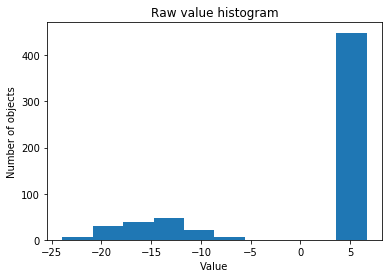

In [196]:
b_x = np.dot(clf.coef_, test_sc.T) + clf.intercept_
 
plt.hist(b_x.T)
plt.title('Raw value histogram')
plt.ylabel('Number of objects')
plt.xlabel('Value')

Такое предсказание может принимать любые вещественные значения, поскольку алгоритм b(x) - это скалярное произведение весов и признаков модели. 

Реализуйте сигмоиду и постройте её график. Что вы можете сказать об этой функции?

In [197]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

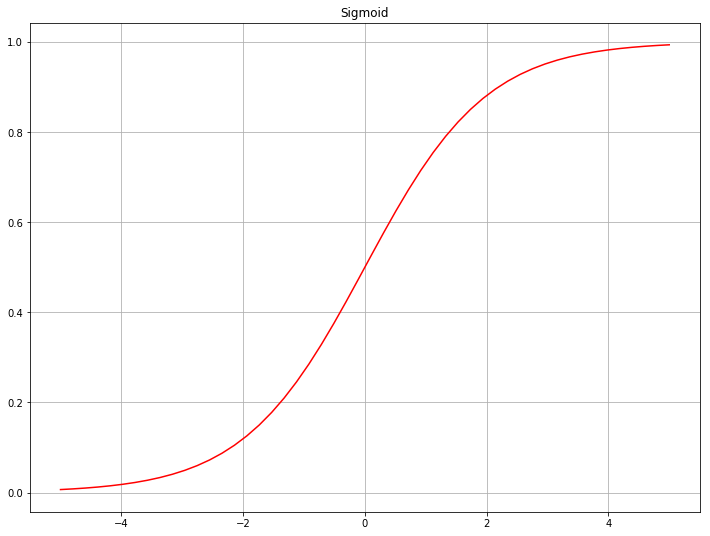

In [198]:
space = np.linspace(-5, 5)
sigmoid_val = sigmoid(space)
plt.figure(figsize=(12,9))
plt.plot(space, sigmoid_val, color = 'red')
plt.title('Sigmoid')
plt.grid(True)

plt.show()

Примените реализованную сигмоиду к $b(x)$. Вы должны получить вероятности принадлежности к положительному классу. Проверьте, что ваши значения совпали с теми, которые получены с помощью `predict_proba`.

In [199]:
sigmoid_b_x = sigmoid(b_x)

In [200]:
(clf.predict_proba(test_sc)[:, 1] == sigmoid_b_x).all()

True

Таким образом, обучение логистической регрессии — настройка параметров $w$ и $w_0$, а применение — подсчёт вероятностей принадлежности положительному классу как применение сигмоды к скалярному произведению признаков и параметров.

Постройте для обученной логистической регрессии ROC-кривую `roc_curve` и PR-кривую `precision_recall_curve`.

In [201]:
from sklearn.metrics import roc_curve, precision_recall_curve

Text(0.5,1,'ROC-curve')

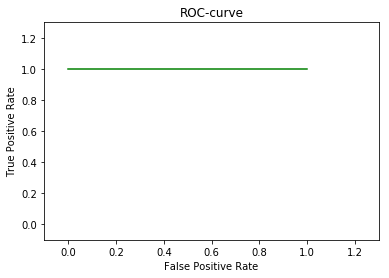

In [207]:
FPR,TPR, _ = roc_curve(y_test, clf.predict_proba(test_sc)[:, 1])


plt.plot(FPR, TPR, color = 'green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim(-0.1, 1.3)
plt.ylim(-0.1, 1.3)
plt.title('ROC-curve')

Text(0.5,1,'PR - Curve')

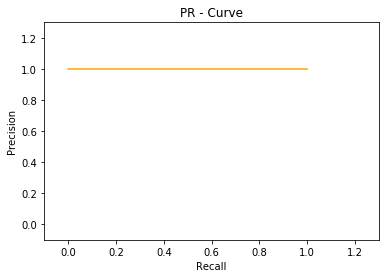

In [204]:
prec, rec, _ = precision_recall_curve(y_test, clf.predict_proba(test_sc)[:, 1])

plt.plot(rec,prec, color = 'orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim(-0.1, 1.3)
plt.ylim(-0.1, 1.3)
plt.title('PR - Curve')

### 4. Бонусное задание. Обучение логистической регрессии.

[2 бонусных балла]

В этой части вы будете обучать самый простой бинарный классификатор — логистическую регрессию. Будем использовать готовую реализацию `LogisticRegression` из scikit-learn.

Логистическая регрессия — линейный метод, то есть в нём предсказание алгоритма вычислаяется как скалярное произведение признаков и весов алгоритма: 

$$
b(x) = w_0 + \langle w, x \rangle = w_0 + \sum_{i=1}^{d} w_i x_i
$$

Для вычисления вероятности положительного класса применяется сигмода. В результате предсказание вероятности принадлежности объекта к положительному классу можно записать как: 

$$
P(y = +1 | x) = \frac{1}{1 + \exp(- w_0 - \langle w, x \rangle )}
$$



Если выше вручную мы только применяли логистическую регрессию, то здесь предлагается реализовать обучение с помощью полного градиентного спуска.
Если кратко, то обучение логистической регрессии с $L_2$-регуляризацией можно записать следующим образом:

$$
Q(w, X) = \frac{1}{l} \sum_{i=1}^{l} \log (1 + \exp(- y_i \langle w, x_i \rangle )) + \frac{\lambda_2}{2} \lVert w \rVert _2^2 \to \min_w
$$

Считаем, что $y_i \in \{-1, +1\}$, а нулевым признаком сделан единичный (то есть $w_0$ соответствует свободному члену). Искать $w$ будем с помощью градиентного спуска:

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla_w Q(w, X)
$$

В случае полного градиентного спуска $\nabla_w Q(w, X)$ считается напрямую (как есть, то есть, используя все объекты выборки). Длину шага $\alpha > 0$ в рамках данного задания предлагается брать равной некоторой малой константе.
Градиент по объекту $x_i$ считается по следующей формуле:

$$
\nabla_w Q(w, x_i) = - \frac{y_i x_i}{1 + \exp(y_i \langle w, x_i \rangle)} + \lambda_2 w
$$

На самом деле неправильно регуляризировать свободный член $w_0$ (то есть при добавлении градиента для $w_0$ не надо учитывать слагаемое с $\lambda_2$). Но в рамках этого задания мы не обращаем на это внимания и работаем со всеми вектором весов одинаково.

В качестве критерия останова необходимо использовать (одновременно):

- проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$) — параметр tolerance
- достижение максимального числа итераций (например, 10000) — параметр max_iter.

Инициализировать веса можно случайным образом или нулевым вектором.

Реализуйте обучение логистической регрессии. Для удобства ниже предоставлен прототип с необходимыми методами. В loss_history необходимо сохранять вычисленное на каждой итерации значение функции потерь.

In [ ]:
from sklearn.base import BaseEstimator

class LogReg(BaseEstimator):
    def __init__(self, lambda_2=1.0, tolerance=1e-4, max_iter=1000, alpha=1e-3):
        """
        lambda_2: L2 regularization param
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        alpha: learning rate
        """
        self.lambda_2 = lambda_2
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.alpha = alpha
        self.w = None
        self.loss_history = None
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []
        
        pass
        
        return self
    
    def predict_proba(self, X):
        """
        X: np.array of shape (l, d)
        ---
        output: np.array of shape (l, 2) where
        first column has probabilities of -1
        second column has probabilities of +1
        """
        if self.w is None:
            raise Exception('Not trained yet')
        
        pass
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        pass

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        pass

- Примените логистическую регресиию на той же выборке.
- Посчитайте качество по тем же метрикам.
- Визуализируйте изменение значений функции потерь от номера итераций.

### 5. Бонусное задание 2. 

[0.002 бонусных балла]

Напишите свой любимый текстовый (у нас же домашнее задание про тексты, ощущаете иронию) мем или анекдот